In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data

In [41]:
data= pd.read_csv('challenge2_dataset.csv')
data.head()

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
4,0.77,0.15,15.0,True


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 4 columns):
1         1992 non-null float64
2         1992 non-null float64
3         1993 non-null float64
Target    1984 non-null object
dtypes: float64(3), object(1)
memory usage: 62.4+ KB


In [43]:
data.shape

(1995, 4)

#### checking null values in dataste

In [44]:
data.isnull().sum()

1          3
2          3
3          2
Target    11
dtype: int64

- 18 Null values are present in dataset
- which are only 1 percent of the data. So we can drop null values

#### Dropping Null values

In [45]:
data=data.dropna()

In [46]:
data.reset_index(inplace=True)

In [47]:
data.shape

(1977, 5)

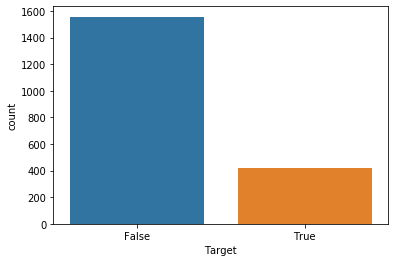

In [48]:
sns.countplot(data['Target'])
plt.show()

- The dataset is imbalance
- We can balance the dataset using smote(oversampling) but it increases the chances of model to overfits and also more computation is required
- hence we will decide wheather to balance the data or not after checking model performance i.e(recall,precision)

In [49]:
data['3'].value_counts().shape

(16,)

In [50]:
data['1'].value_counts().shape

(20,)

In [51]:
data['2'].value_counts().shape

(20,)

#### Encoding the target variable 

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
data['Target']=le.fit_transform(data['Target'])

- after encoding 
  - False = 0
  - True = 1

In [54]:
data.head()

,index,1,2,3,Target
0,0,0.60,0.31,13.0,0
1,1,0.74,0.33,21.0,0
2,4,0.77,0.15,15.0,1
3,5,0.46,0.17,18.0,0
4,6,0.49,0.26,10.0,0


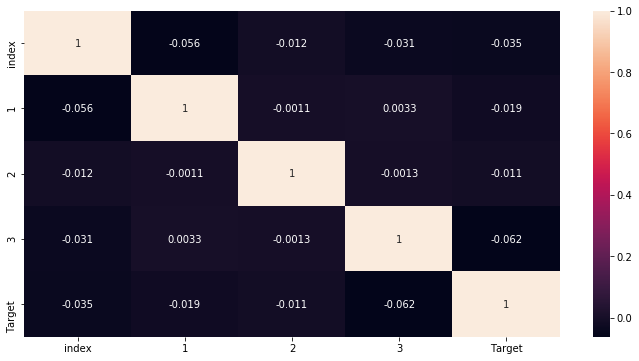

In [55]:
plt.subplots(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

-  there is very low  multicollinearity

In [56]:
X = data.drop(['Target','index'],axis=1)
y = data['Target']

In [57]:
X.head()

,1,2,3
0,0.60,0.31,13.0
1,0.74,0.33,21.0
2,0.77,0.15,15.0
3,0.46,0.17,18.0
4,0.49,0.26,10.0


#### splitting data for train and test

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [60]:
X_train.head()

,1,2,3
1241,0.46,0.14,17.0
949,0.74,0.14,15.0
1891,0.80,0.19,16.0
1537,0.71,0.17,13.0
660,0.71,0.22,10.0


### fitting base model

##### LogisticRegression 

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
log.score(X_train,y_train)

0.848879248011569

In [64]:
log.score(X_test,y_test)

0.8434343434343434

- By referring above train and test score we can say model is doing good

In [65]:
y_pred = log.predict(X_test)
y_prob = log.predict_proba(X_test)[:,1] 

In [66]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       459
           1       0.74      0.47      0.58       135

    accuracy                           0.84       594
   macro avg       0.80      0.71      0.74       594
weighted avg       0.83      0.84      0.83       594



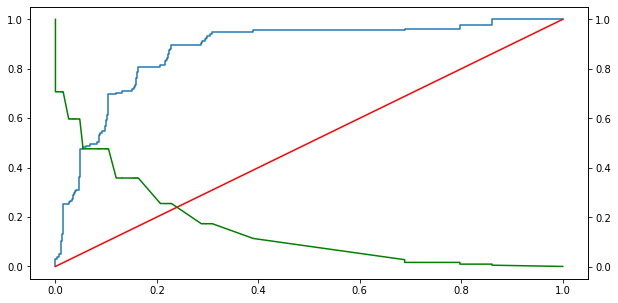

In [67]:
fpr, tpr, thresh = roc_curve(y_test, y_prob)
thresh[thresh>1] = 1

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax1 = ax.twinx()
ax1.plot(fpr,thresh,'g')
plt.show()

- by refering classification report we can say that the recall value of minority class data is low 
- also the f1 score is very low for minority class

#### RandomForest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

1.0
0.9764309764309764


In [71]:
y_pred=rfc.predict(X_test)
y_prob=rfc.predict_proba(X_test)[:,1] 

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       459
           1       0.98      0.92      0.95       135

    accuracy                           0.98       594
   macro avg       0.98      0.96      0.97       594
weighted avg       0.98      0.98      0.98       594



In [73]:
confusion_matrix(y_test,y_pred)

array([[456,   3],
       [ 11, 124]], dtype=int64)

- The recall value for minority class is great here also the f1 score
- also FN(False negative) and FP(False positive) are 3 and 9 that means model is doing great  
- hence oversampling of data is not required 

##### testing data

In [74]:
test = pd.read_csv('challenge2_prediction.csv')
test.head()

,1,2,3
0,0.74,0.21,22.0
1,0.43,0.15,14.0
2,0.77,0.10,15.0
3,0.57,0.31,15.0
4,0.80,0.31,20.0


In [75]:
test.isnull().sum()

1    4
2    5
3    4
dtype: int64

- for testing data we cannot droop null values hence replacing null values with mean value

In [76]:
test.mean()

1     1.941857
2     2.478282
3    42.185123
dtype: float64

In [77]:
test=test.fillna(value=test.mean())

In [78]:
test.isnull().sum()

1    0
2    0
3    0
dtype: int64

In [79]:
test=test.round(2)
test.head()

,1,2,3
0,0.74,0.21,22.0
1,0.43,0.15,14.0
2,0.77,0.10,15.0
3,0.57,0.31,15.0
4,0.80,0.31,20.0


In [80]:
y_pred = rfc.predict(test)

In [81]:
test['target']=y_pred

In [82]:
test.head()

,1,2,3,target
0,0.74,0.21,22.0,0
1,0.43,0.15,14.0,0
2,0.77,0.10,15.0,1
3,0.57,0.31,15.0,0
4,0.80,0.31,20.0,0


In [83]:
test['target']=test['target'].map({0:'False',1:'True'})

In [84]:
test.head()

,1,2,3,target
0,0.74,0.21,22.0,False
1,0.43,0.15,14.0,False
2,0.77,0.10,15.0,True
3,0.57,0.31,15.0,False
4,0.80,0.31,20.0,False


In [85]:
test.to_csv('predictionclassification_with target.csv',float_format='%.16g')